# Lab 2.6

Goals:
 
* Generate random data using numpy.
* Generate histograms using matplotlib.
* Determine how the average of a sample of a random variable behaves.


### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


In this lab we're going to generate random data and display it.  First we'll need to import libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

First you'll need a random variable to study.  Run the code cell below to define some PDFs, then pick a different one than other members of your group.  Be sure to read the comments below your choice.

In [ ]:
# ryan 

def pdf1(x):
  return np.where((x >= 0) & (x <= 1) , x*(1-x)**4*30,0)
# pdf1 is the pdf of the beta(2,5) random variable
# create a size n sample of beta (2,5) with
# np.random.beta(2,5,n)

# sim

def pdf2(x):
  return np.where((x >= 3) & (x <= 6) , (2*x-6)/9,0)
# pdf2 is the pdf of the triangular(3,6,6) random variable
# create a size n sample of triangular(3,6,6) with
# np.random.triangular(3, 6, 6, n)


def pdf3(x):
  return np.where((x >= 1) & (x <= 6) , 0.2,0)
# pdf3 is the pdf of the uniform random variable on [1,6]
# create a size n sample of this variable with
# np.random.uniform(1,6,n)


def pdf4(x):
  return np.where((x > 0) & (x < 1) , 1/x**0.5/(1-x)**(0.5)/3.1415926,0)
# pdf4 is the pdf of the beta(0.5,0.5) random variable
# create a size n sample of beta(0.5,0.5) with
# np.random.beta(0.5,0.5,n)



def pdf5(x):
  return np.where((x >= 2) & (x < 4) , (4-x)/2,0)
# pdf5 is the pdf of the triangular(2,2,4) random variable
# create a size n sample of triangular(2,2,4) with
# np.random.triangular(2,2,4,n)




def pdf6(x):
    return np.where((x >= 0) & (x < 1) , 70*x**3/(1-x)**(0.5)/64,0)
# pdf6 is the pdf of the beta(4,0.5) random variable
# create a size n sample of beta(4,0.5) with
# np.random.beta(4,0.5,n)




## Q1 

We saw in the pre-lab that a histogram of a sample from a normal random variable looks like the pdf of that variable.

* Make a nice graph that shows a properly sized and binned histogram of a sample from your random variable lines up with a plot of your PDF.  
 * You will need to pick your `x` values to line up with the outcomes of your random variable.
 * You will also have to resize (by multiplying) the PDF outputs to make your histogram and your plot the same height.
 * Make sure your graph has a title.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


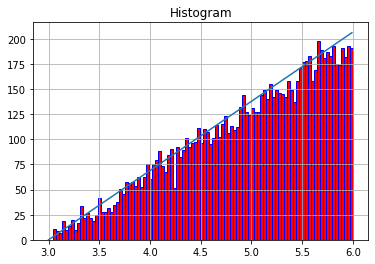

In [ ]:
def pdf2(x):
  return np.where((x >= 3) & (x <= 6) , (2*x-6)/9,0)
# pdf2 is the pdf of the triangular(3,6,6) random variable
# create a size n sample of triangular(3,6,6) with
# np.random.triangular(3, 6, 6, n)

x = np.arange(3,6,.01)
y = pdf2(x) * 310

ax = plt.axes()
ax.plot(x,y)
ax.grid()

#sample = np.random.beta(2,5,10000)
sample = np.random.triangular(3, 6, 6, 10000)
ax = plt.axes()
ax.hist(sample, bins = 100, edgecolor = 'blue', color = 'red')
ax.set_title('Histogram')
plt.show()

## Q2
Recall that averaging samples of a random variable produces a new random variable.  We will see how that works with your random variable.
* Rewrite the `sampleaverage()` function from the prelab to create averages of samples from your random variable instead of a normal random variable.
* Use your new `sampleaverage()` function to make an array of 10000 averages of samples of your random variable with sample size
 * 1
 * 10
 * 100
 * and 1000
* Make histograms of each of these samples.  Include useful titles!  
* Explain how the shape of the histograms appears to be changing as the sample size increases from 1 to 1000.

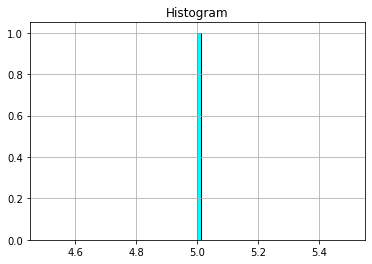

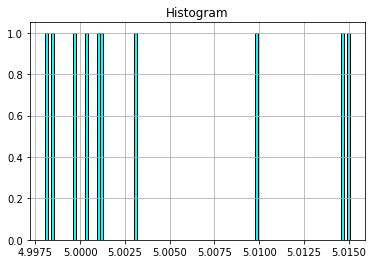

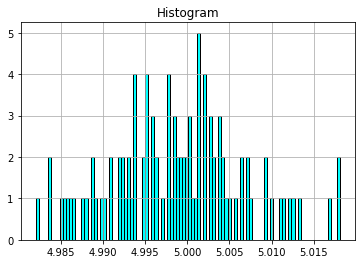

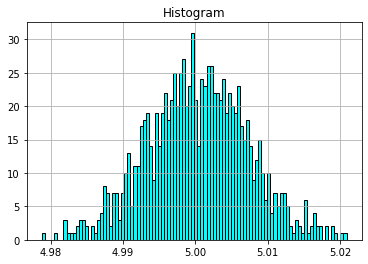

In [ ]:
def sampleaverage(samples=10000,size=1): #samples=number of normal RV to average, size=number of averages to return
  averages=np.array([]) # make an empty array
  for i in range(size): # notice i is a dummy variable
    sample=np.random.triangular(3, 6, 6, 10000) # take a sample of size samples
    x=np.average(sample) #average the elements of sample
    averages=np.append(averages,x) #append the average x to the array averages and save it back to means
  return averages

a = sampleaverage(10000, 1)
b = sampleaverage(10000, 10)
c = sampleaverage(10000, 100)
d = sampleaverage(10000, 1000)

# a
ax = plt.axes()
ax.grid()
ax.hist(a, bins = 100, edgecolor = 'black', color = 'cyan')
ax.set_title('Histogram')
plt.show()

# b
ax = plt.axes()
ax.grid()
ax.hist(b, bins = 100, edgecolor = 'black', color = 'cyan')
ax.set_title('Histogram')
plt.show()

# c
ax = plt.axes()
ax.grid()
ax.hist(c, bins = 100, edgecolor = 'black', color = 'cyan')
ax.set_title('Histogram')
plt.show()

# d
ax = plt.axes()
ax.grid()
ax.hist(d, bins = 100, edgecolor = 'black', color = 'cyan')
ax.set_title('Histogram')
plt.show()


## Q3 

When the sample size is large, the average is approximately a normal random variable. That's why your graphs started looking like bell curves.  But what are the parameters ($\mu$, $\sigma$) of these normal random variables?
* Make a nice histogram showing how last random variable in Q2 (sample size 1000) matches up to a normal PDF using `norm.pdf()`.  Make sure your graph has a title.

You'll have to do some trial and error with your $\mu$, $\sigma$ and height multiplier to make this work.

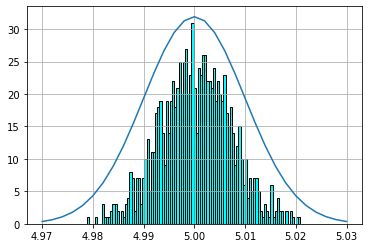

In [ ]:
x = np.arange(4.97, 5.03, .002)
mu = 5
sigma = .01
y = norm.pdf(x, mu, sigma)

ax = plt.axes()
ax.plot(x, y*.8)
ax.grid()

# last random variable in q2
ax.hist(d, bins = 100, edgecolor = 'black', color = 'cyan')
# ADD TITLE!!!! 
plt.show()

## Q4

How does the number of samples in each average affect the parameters $\mu$ and $\sigma$?
* Increase the size of the samples you are averaging to 10000.  Make a nice histogram with a matching normal PDF and a title.
* In a text cell, explain how does the $\mu$ and $\sigma$ of this matching normal random variable compare to the $\mu$ and $\sigma$ from the sample size 1000 averages in Q3?



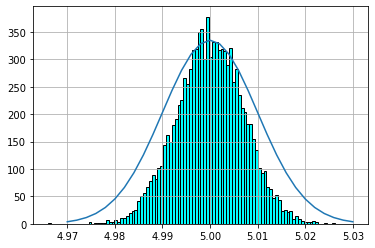

In [ ]:
e = sampleaverage(10000, 10000)

# pdf
x = np.arange(4.97, 5.03, .002)
mu = 5
sigma = .01
y = norm.pdf(x, mu, sigma)
ax = plt.axes()
ax.grid()

ax.plot(x, y * 8.4)

# histogram
ax.hist(e, bins = 100, edgecolor = 'black', color = 'cyan')
plt.show()

The mu and sigma of the matching normal random variable are the same as the mu and sigma of the sample size 1000 averages in q3. 

## Q5 

Other students in your group had different density functions than you.  They also obtained different values for $\mu$ and $\sigma$ in Q3.  Compare your data with theirs to answer the following questions in a text cell.
* What property of your density function appears to determine the value of $\mu$ in your distribution of averages? 
* How do the shapes of different density functions appear to affect the size of $\sigma$? Reference their shapes and $\sigma$s specifically in your answer.
* Why do the relationships you observed make sense?

Be sure you compare averages of the same sample sizes. If you and your groupmates are using different sized samples, you won't be able to tell whether the differences you observe come from differences in your random variables, or from differences in what averages you're collecting.  
